# Objective :
* Finding the recommendation of similar movies for the user who had watched a paticular movie

In [1]:
import pandas as pd 
import numpy as numpy 
import warnings
warnings.filterwarnings("ignore")

In [2]:
movie = pd.read_csv("movies.csv")#This has the movie title and geners
rating = pd.read_csv("ratings.csv")# This has the ratings given to the movies watched by the users

In [3]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
len(movie)

9742

In [6]:
len(rating)

100836

### merging the tables

In [7]:
df = pd.merge(rating,movie,on="movieId")

In [8]:
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [10]:
len(df)

100836

## grouping all the same movie names and finding the average movie rating and sorting in descending order


In [15]:
df.groupby('title')['rating'].mean().sort_values(ascending=False)

title
Karlson Returns (1970)                                5.0
Winter in Prostokvashino (1984)                       5.0
My Love (2006)                                        5.0
Sorority House Massacre II (1990)                     5.0
Winnie the Pooh and the Day of Concern (1972)         5.0
Sorority House Massacre (1986)                        5.0
Bill Hicks: Revelations (1993)                        5.0
My Man Godfrey (1957)                                 5.0
Hellbenders (2012)                                    5.0
In the blue sea, in the white foam. (1984)            5.0
Won't You Be My Neighbor? (2018)                      5.0
Red Sorghum (Hong gao liang) (1987)                   5.0
Love Exposure (Ai No Mukidashi) (2008)                5.0
My Sassy Girl (Yeopgijeogin geunyeo) (2001)           5.0
The Love Bug (1997)                                   5.0
Ballad of Narayama, The (Narayama bushiko) (1983)     5.0
Heidi Fleiss: Hollywood Madam (1995)                  5.0
Louis Th

## The above inforamtion may not be correct if the movie got rating of 5 from only 1 user.

#### grouping all the same movie titles and counting the no of users rated the movie and sorting in descending order


In [16]:
df.groupby('title')['rating'].count().sort_values(ascending=False)

title
Forrest Gump (1994)                                                               329
Shawshank Redemption, The (1994)                                                  317
Pulp Fiction (1994)                                                               307
Silence of the Lambs, The (1991)                                                  279
Matrix, The (1999)                                                                278
Star Wars: Episode IV - A New Hope (1977)                                         251
Jurassic Park (1993)                                                              238
Braveheart (1995)                                                                 237
Terminator 2: Judgment Day (1991)                                                 224
Schindler's List (1993)                                                           220
Fight Club (1999)                                                                 218
Toy Story (1995)                                

## creating these values in a data frame

In [17]:
movie_ratings = pd.DataFrame(df.groupby('title')['rating'].mean()) #avg rating for each movie

In [18]:
movie_ratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [19]:
movie_ratings['n_ratings']=df.groupby('title')['rating'].count()

In [22]:
movie_ratings.head()
# Here we got the movie rating along with the count of users who rated that movie

,rating,n_ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


### EDA

### Joint plot

In [23]:
import seaborn as sns

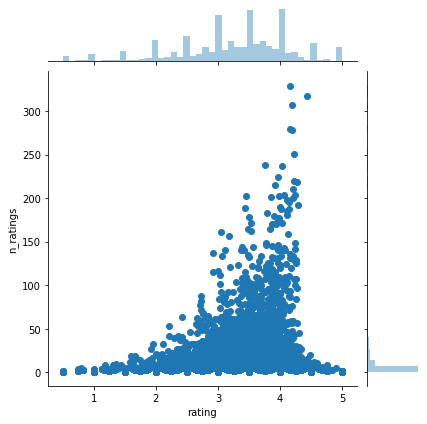

In [25]:
sns.jointplot(x='rating',y='n_ratings',data=movie_ratings)

### creating a pivot table

In [26]:
rating_mat = df.pivot_table(values='rating',columns='title',index='userId')

In [27]:
rating_mat

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [29]:
movie_ratings.sort_values('n_ratings',ascending=False).head(10)

,rating,n_ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


### Finding the recommendations for a single movie 
* finding movie recommendation for Matrix,The(1999)

In [39]:
# consider one movie from movie data table
movie[movie['title']=='Matrix, The (1999)']

,movieId,title,genres
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller


In [40]:
#consider rating from rating matrix table given by the user for the movie which we selected selected 
matrix_rating=rating_mat['Matrix, The (1999)']
matrix_rating

userId
1      5.0
2      NaN
3      NaN
4      1.0
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     0.5
11     NaN
12     NaN
13     5.0
14     NaN
15     4.0
16     3.5
17     5.0
18     4.5
19     4.0
20     NaN
21     4.0
22     NaN
23     NaN
24     4.0
25     5.0
26     NaN
27     NaN
28     4.0
29     NaN
30     5.0
      ... 
581    3.5
582    5.0
583    NaN
584    NaN
585    NaN
586    5.0
587    4.0
588    NaN
589    NaN
590    4.0
591    5.0
592    NaN
593    2.5
594    5.0
595    NaN
596    4.0
597    NaN
598    NaN
599    5.0
600    3.0
601    5.0
602    NaN
603    5.0
604    NaN
605    NaN
606    5.0
607    5.0
608    5.0
609    NaN
610    5.0
Name: Matrix, The (1999), Length: 610, dtype: float64

In [34]:
#finding similar movies to the movie we selected by finding the correlation with others 
similar_to_matrix = rating_mat.corrwith(matrix_rating)

In [41]:
similar_to_matrix.head()

title
'71 (2014)                                NaN
'Hellboy': The Seeds of Creation (2004)   NaN
'Round Midnight (1986)                    NaN
'Salem's Lot (2004)                       NaN
'Til There Was You (1997)                 NaN
dtype: float64

In [42]:
#taking them into a DataFrame and removing null values 
corr_matrix = pd.DataFrame(similar_to_matrix,columns=['correlation'])
corr_matrix.dropna(inplace=True)
corr_matrix.head()

,correlation
title,
"'burbs, The (1989)",-0.160843
(500) Days of Summer (2009),0.302316
*batteries not included (1987),0.392232
...And Justice for All (1979),0.654654
10 Cent Pistol (2015),-1.000000


In [43]:
corr_matrix.sort_values('correlation',ascending=False)

,correlation
title,
Haywire (2011),1.0
Highway 61 (1991),1.0
World on a Wire (Welt am Draht) (1973),1.0
"War Zone, The (1999)",1.0
"Hitcher, The (1986)",1.0
Gross Anatomy (a.k.a. A Cut Above) (1989),1.0
Paper Towns (2015),1.0
Juwanna Mann (2002),1.0
Topsy-Turvy (1999),1.0


##### these movies are highly corelated with "matrix movie" .
* but some of these movies have watched only by one user and given the rating .
* so to avoid that we take the correlation of movies which have a threshold of users watched the paticular movie.

In [47]:
### joining the no of rating with corr_matrix
corr_matrix = corr_matrix.join(movie_ratings.n_ratings)

In [48]:
corr_matrix


,correlation,n_ratings
title,,
"'burbs, The (1989)",-0.160843,17
(500) Days of Summer (2009),0.302316,42
*batteries not included (1987),0.392232,7
...And Justice for All (1979),0.654654,3
10 Cent Pistol (2015),-1.000000,2
10 Cloverfield Lane (2016),0.637813,14
10 Items or Less (2006),1.000000,3
10 Things I Hate About You (1999),0.166496,54
"10,000 BC (2008)",0.205960,17


In [45]:
import matplotlib.pyplot as plt

(array([7.048e+03, 1.021e+03, 4.150e+02, 3.020e+02, 1.550e+02, 1.620e+02,
        1.250e+02, 8.800e+01, 7.500e+01, 4.900e+01, 3.900e+01, 3.000e+01,
        2.800e+01, 2.600e+01, 1.800e+01, 2.000e+01, 1.900e+01, 9.000e+00,
        1.300e+01, 1.100e+01, 7.000e+00, 1.200e+01, 4.000e+00, 1.000e+00,
        4.000e+00, 5.000e+00, 3.000e+00, 3.000e+00, 5.000e+00, 2.000e+00,
        7.000e+00, 0.000e+00, 2.000e+00, 3.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00]),
 array([  1.  ,   7.56,  14.12,  20.68,  27.24,  33.8 ,  40.36,  46.92,
         53.48,  60.04,  66.6 ,  73.16,  79.72,  86.28,  92.84,  99.4 ,
        105.96, 112.52, 119.08, 125.64, 132.2 , 138.76, 145.32, 151.88,
        158.44, 165.  , 171.56, 178.12, 184.68, 191.24, 197.8 , 204.36,
        210.92, 217.48, 224.04, 230.6 , 237.16, 243.72, 250.28, 256.84,
        263.4 , 

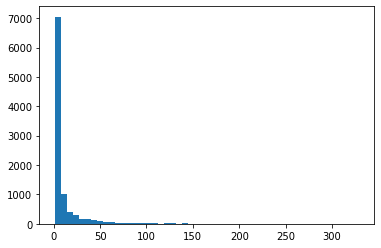

In [46]:
## Finding the the percentage of threshould to be choosen 
plt.hist(movie_ratings.n_ratings,bins=50)

* we can cinsider minimum of 50 user movie ratings from the graph

In [50]:
# top 10 movies recommended with "matrix movie"
corr_matrix[corr_matrix.n_ratings >50].sort_values('correlation',ascending=False).head(10)

,correlation,n_ratings
title,,
"Matrix, The (1999)",1.000000,278
Slumdog Millionaire (2008),0.613839,71
Kung Fu Panda (2008),0.612549,54
Interstellar (2014),0.599040,73
Legends of the Fall (1994),0.567155,68
"Dark Knight Rises, The (2012)",0.557125,76
Die Hard (1988),0.544466,145
"Grand Budapest Hotel, The (2014)",0.543633,52
"Matrix Reloaded, The (2003)",0.522551,96


### Slumdog Millionaire (2008),	Kung Fu Panda (2008)	 are the top two movies recommended to the user who watched "Matrix,The(1999) movie"